In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('rainfall_nepal.csv')
print(df.head())



   Year  Rainfall_mm
0  2000         1450
1  2001         1300
2  2002         1700
3  2003         1600
4  2004         4000


Calculate Quasrtiles and Percentiles

In [90]:
rainfall = df['Rainfall_mm']

#using numpy to calculate percentiles
P1=np.percentile(rainfall, 1)
P5=np.percentile(rainfall, 5)
P10=np.percentile(rainfall, 10)
P90=np.percentile(rainfall, 90)

print(f"P1 (1%)",P1)
print(f"P5 (5%)",P5)
print(f"P10 (10%)",P10)
print(f"P90 (90%)",P90)


#using pandas to calculate quartiles
Q1_pd = rainfall.quantile(0.25)
Q2_pd = rainfall.quantile(0.50)
Q3_pd = rainfall.quantile(0.75)


print(f"Q1 (25%)",Q1)
print(f"Q2 (50%)",Q2)
print(f"Q3 (75%)",Q3)


P1 (1%) 1322.5
P5 (5%) 1412.5
P10 (10%) 1465.0
P90 (90%) 1675.0
Q1 (25%) 1493.75
Q2 (50%) 1535.0
Q3 (75%) 1605.0


Calculate IQR & Outlier Bounds


In [91]:
# Calculate IQR
IQR = Q3 - Q1
print(f"IQR:",IQR)

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
 
print(f"Lower Bound:",lower_bound)
print(f"Upper Bound:",upper_bound)


IQR: 111.25
Lower Bound: 1326.875
Upper Bound: 1771.875


Detect Outliers

In [92]:
# Boolean mask for outliers
outliers = (rainfall < lower_bound) | (rainfall > upper_bound)

# Filter outlier values
outlier_values = rainfall[outliers]

print("Outliers detected:")
print(outlier_values)


Outliers detected:
1    1300
4    4000
Name: Rainfall_mm, dtype: int64


Visualize Outliers

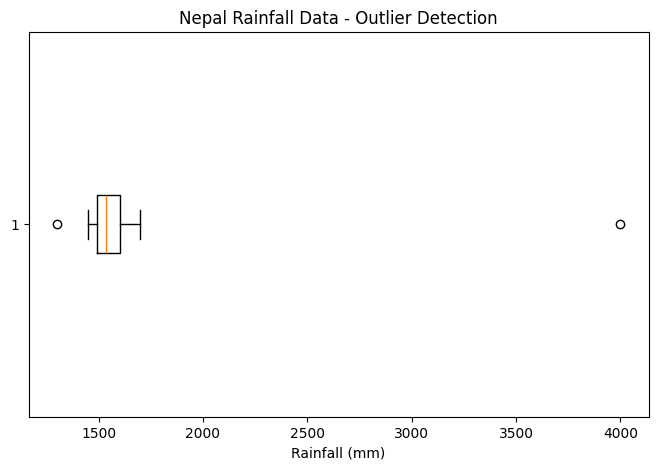

In [93]:
plt.figure(figsize=(8,5))
plt.boxplot(rainfall, vert=False)
plt.title("Nepal Rainfall Data - Outlier Detection")
plt.xlabel("Rainfall (mm)")
plt.show()


Remove Outliers from the Data

In [94]:

# Remove outliers using IQR bounds
df_cleaned = df[(df['Rainfall_mm'] >= lower_bound) & (df['Rainfall_mm'] <= upper_bound)]

print("Original dataset size:", len(df))
print("Cleaned dataset size:", len(df_cleaned))
print("\nCleaned Data:")
print(df_cleaned)


Original dataset size: 16
Cleaned dataset size: 14

Cleaned Data:
    Year  Rainfall_mm
0   2000         1450
2   2002         1700
3   2003         1600
5   2005         1550
6   2006         1480
7   2007         1520
8   2008         1490
9   2009         1510
10  2010         1580
11  2011         1620
12  2012         1590
13  2013         1650
14  2014         1495
15  2015         1505


Compare Before vs After (Visualization)

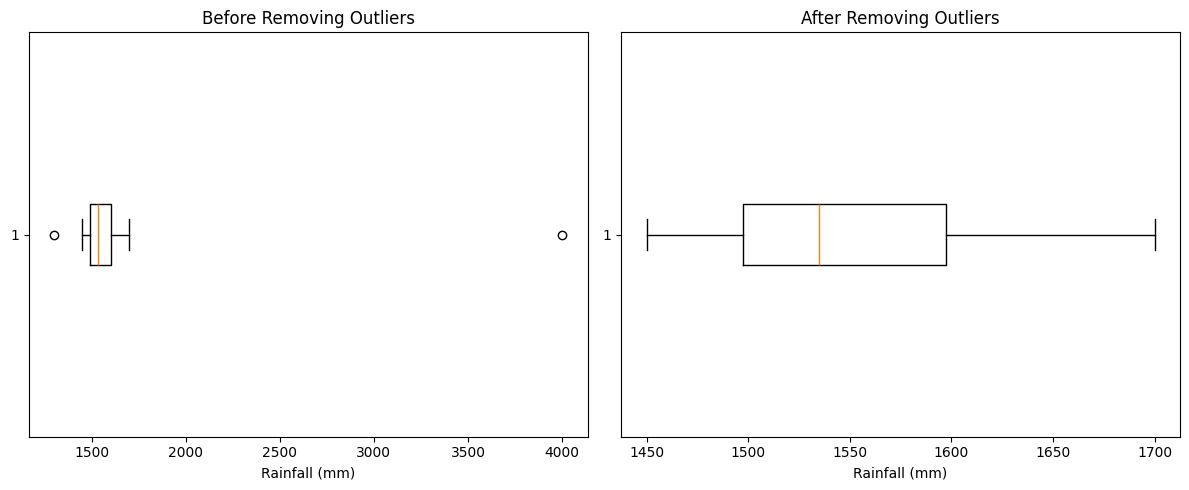

In [95]:
plt.figure(figsize=(12,5))
# Before removing outliers
plt.subplot(1,2,1)
plt.boxplot(df['Rainfall_mm'], vert=False)
plt.title("Before Removing Outliers")
plt.xlabel("Rainfall (mm)")

# After removing outliers
plt.subplot(1,2,2)
plt.boxplot(df_cleaned['Rainfall_mm'], vert=False)
plt.title("After Removing Outliers")
plt.xlabel("Rainfall (mm)")

plt.tight_layout()
plt.show()


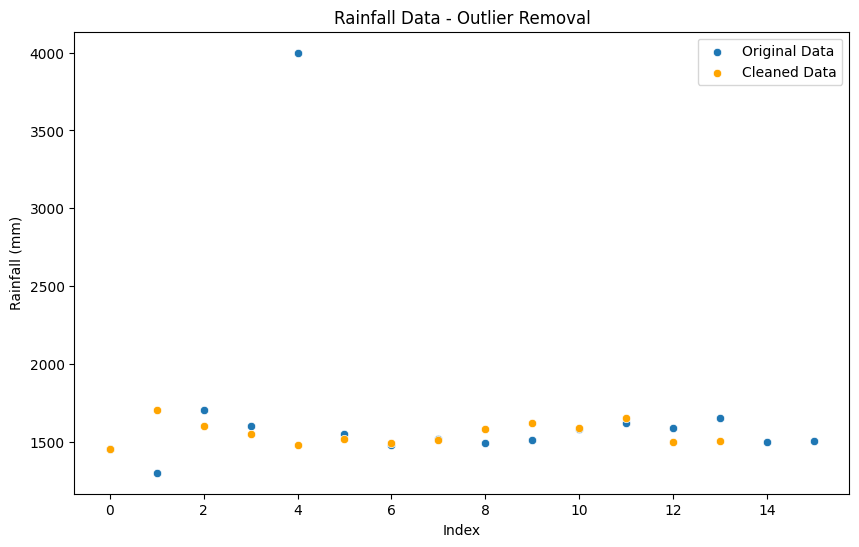

In [96]:
#use scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=np.arange(len(df)), y='Rainfall_mm', label='Original Data')
sns.scatterplot(data=df_cleaned, x=np.arange(len(df_cleaned)), y='Rainfall_mm', color='orange', label='Cleaned Data')
plt.title("Rainfall Data - Outlier Removal")
plt.xlabel("Index")
plt.ylabel("Rainfall (mm)")
plt.legend()
plt.show()